Proses ini bertujuan untuk mengelompokkan setiap provinsi di Indonesia ke dalam beberapa klaster tertentu sehingga dapat mengetahui daerah-daerah dengan jumlah kasus yang tergolong banyak dan jumlah kasus yang tergolong sedikit. Korelasi fitur dikategorikan berdasarkan pulau utama di Indonesia. Variabel-variabel yang digunakan dalam K-Means clustering adalah jumlah kasus kematian, jumlah kasus kesembuhan, jumlah kasus aktif, ukuran kepadatan populasi, luas area dan kemungkinan kematian

Dalam penelitian ini tahapan yang dilakukan adalah : 
1) Tahap Pengumpulan Data, 
2) Tahap Processing Data, 
3) Visualisasi, 
4) Modelling, Pengujian Data dan Analisis Data dan 
5) Output/Insight

# Pengumpulan data

Data yang digunakan dalam penelitian ini adalah data mengenai kasus COVID-19 di Indonesia yang diambil dari website AtapData (atapdata.ai). Data yang terdapat dalam dataset ini berupa : Date, Location ISO Code, Location, New Cases, New Deaths, New Recovered, New Active Cases, Total Cases, Total Deaths, Total Recovered, Total Active Cases, Location Level, City or Regency, Province, Country, Continent, Island, Time Zone, Special Status, Total Regencies, Total Cities, Total Districts, Total Urban Villages, Total Rural Villages, Area (km2), Population, Population Density, Longitude, Latitude, New Cases per Million, Total Cases per Million, New Deaths per Million, Total Deaths per Million, Case Fatality Rate, Case Recovered Rate, Growth Factor of New Cases dan Growth Factor of New Deaths.

# Processing

Import library package yang diperlukan

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Mendefiniskan nama kolom dalam dataset agar memudahkan dalam proses pengkodean selanjutnya

In [72]:
class ColumnData:
    date = 'Date'
    province = 'Province'
    island = 'Island'
    cases = 'Total Cases'
    deaths = 'Total Deaths'
    recovered = 'Total Recovered'
    actives_cases = 'Total Active Cases'
    population = 'Population'
    area = 'Area (km2)'
    mortality = 'Mortality'
    density = 'Population Density'

Mendefinisikan create bins untuk splitting & binning data

In [73]:
def create_bins(df, columns, q=5):
    for column in columns:
        df[column] = pd.qcut(df[column], q, duplicates='drop').cat.codes

Mendefinisikan normalize_data untuk normalizing data

In [74]:
def normalize_data(df, columns):
    minMaxScaler = MinMaxScaler()
    df[columns] = minMaxScaler.fit_transform(d[columns])

Membaca dan menampilkan 5 data

In [75]:
data = pd.read_csv('/Users/dimas/Documents/Programming/tubes/damin/covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,...,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,...,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,120,...,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,1000.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,1,1,...,101.805109,0.511648,0.16,0.33,0.0,0.16,50.00%,50.00%,NaN,NaN


In [76]:
data.shape

(9959, 37)

Mengecek missing value

In [77]:
data.isnull().sum()

Date                              0
Location ISO Code                 0
Location                          0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Location Level                    0
City or Regency                9959
Province                        305
Country                           0
Continent                         0
Island                          305
Time Zone                       305
Special Status                 8516
Total Regencies                   0
Total Cities                    279
Total Districts                   0
Total Urban Villages            281
Total Rural Villages            306
Area (km2)                        0
Population                        0
Population Density                0
Longitude                   

Memilih kolom yang akan digunakan

In [78]:
data = data[[
    ColumnData.date,
    ColumnData.province,
    ColumnData.island,
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.area,
    ColumnData.density
]]

Menghapus jika ada data yang kosong

In [79]:
data

,Date,Province,Island,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,Area (km2),Population Density
0,3/1/2020,DKI Jakarta,Jawa,489,20,39,430,10846145,664,16334.31
1,3/2/2020,DKI Jakarta,Jawa,491,20,39,432,10846145,664,16334.31
2,3/2/2020,NaN,NaN,2,0,0,2,265185520,1916907,138.34
3,3/2/2020,Jawa Barat,Jawa,12,5,120,-113,45161325,35378,1276.55
4,3/2/2020,Riau,Sumatera,2,1,1,0,6074100,87024,69.80
...,...,...,...,...,...,...,...,...,...,...
9954,12/31/2020,Sulawesi Tenggara,Sulawesi,7907,147,6696,1064,2635461,38068,69.23
9955,12/31/2020,Sulawesi Utara,Sulawesi,9671,310,7003,2358,2641884,13892,190.17
9956,12/31/2020,Sumatera Barat,Sumatera,23464,522,18030,4912,5519245,42013,131.37
9957,12/31/2020,Sumatera Selatan,Sumatera,11826,599,9364,1863,8217551,91592,89.72


In [80]:
data = data.dropna(axis=0, how="any")

In [81]:
data.shape

(9654, 10)

Membuat format data pada tanggal menjadi date.

In [82]:
data[ColumnData.date] = pd.to_datetime(data.Date, infer_datetime_format=True).dt.date

Membuat kolom baru yaitu ‘Mortality’ 

In [83]:
data[ColumnData.mortality] = data[ColumnData.deaths] / data[ColumnData.cases]

In [84]:
data

,Date,Province,Island,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,Area (km2),Population Density,Mortality
0,2020-03-01,DKI Jakarta,Jawa,489,20,39,430,10846145,664,16334.31,0.040900
1,2020-03-02,DKI Jakarta,Jawa,491,20,39,432,10846145,664,16334.31,0.040733
3,2020-03-02,Jawa Barat,Jawa,12,5,120,-113,45161325,35378,1276.55,0.416667
4,2020-03-02,Riau,Sumatera,2,1,1,0,6074100,87024,69.80,0.500000
5,2020-03-03,DKI Jakarta,Jawa,493,20,39,434,10846145,664,16334.31,0.040568
...,...,...,...,...,...,...,...,...,...,...,...
9954,2020-12-31,Sulawesi Tenggara,Sulawesi,7907,147,6696,1064,2635461,38068,69.23,0.018591
9955,2020-12-31,Sulawesi Utara,Sulawesi,9671,310,7003,2358,2641884,13892,190.17,0.032055
9956,2020-12-31,Sumatera Barat,Sumatera,23464,522,18030,4912,5519245,42013,131.37,0.022247
9957,2020-12-31,Sumatera Selatan,Sumatera,11826,599,9364,1863,8217551,91592,89.72,0.050651


# Visualisasi

Jumlah kasus dan kematian dalam kurun waktu, setiap data dibagi jika jumlah kasus melebihi 100.


In [85]:
dfl = data[
    [ColumnData.date, ColumnData.cases, ColumnData.deaths, ColumnData.recovered]
].groupby(ColumnData.date).sum().reset_index()

dfl = dfl[(dfl[ColumnData.cases] >= 100)].melt(id_vars=ColumnData.date,
                                               value_vars=[ColumnData.cases, ColumnData.deaths, ColumnData.recovered])

Visualisasi jumlah perkembangan kasus dengan line plot

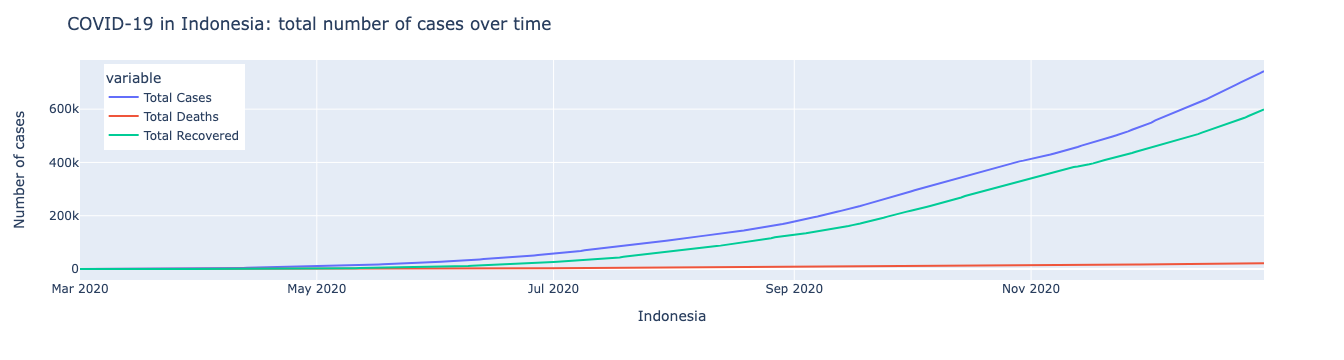

In [86]:
vis_lp = px.line(dfl, x=ColumnData.date, y='value', color='variable')
vis_lp.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                     xaxis_title='Indonesia', yaxis_title='Number of cases',
                     legend=dict(x=0.02, y=0.98))
vis_lp.show()

> Pada visualisasi digambarkan kasus COVID-19 di Indonesia pada bulan Maret 2020 hingga Oktober 2020 mengalami peningkatan secara signifikan. Rata-rata kasus baru setiap harinya sebanyak 1.713 kasus. Jumlah kasus COVID-19 hingga 11 Oktober 2020 tercatat sebanyak 333.449 kasus dengan jumlah pasien sembuh sebanyak 255.027 orang dan jumlah pasien yang meninggal sebanyak 11.844 orang.

Visualisasi line plot 5 provinsi dengan jumlah kasus dan kematian tertinggi

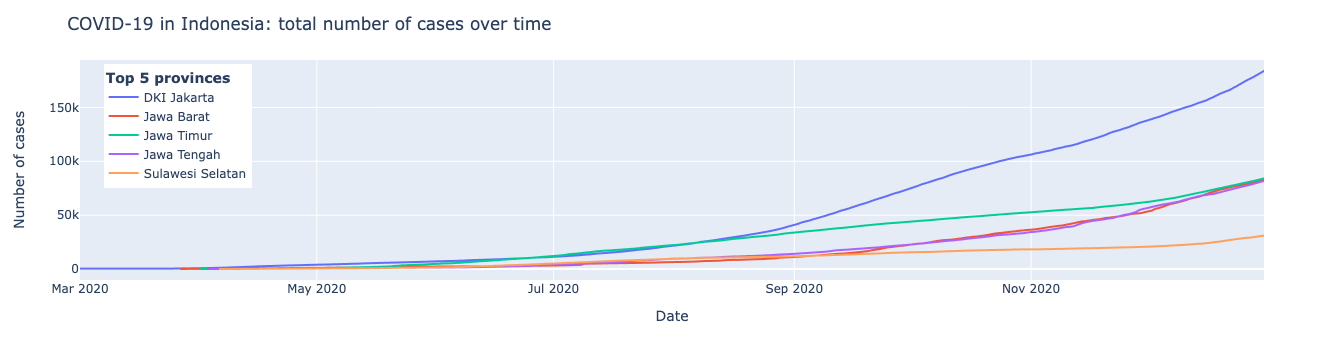

In [87]:
pd.options.mode.chained_assignment = None
limit = 5
group = data.groupby(ColumnData.province)
t = group.tail(1).sort_values(ColumnData.cases, ascending=False).set_index(ColumnData.province).drop(
    columns=[ColumnData.date])

s = data[(data[ColumnData.province].isin([i for i in t.index[:limit]]))]
s = s[(s[ColumnData.cases] >= 100)]

# vis_lp = visualization line plot
vis_lp2 = px.line(s, x=ColumnData.date, y=ColumnData.cases, color=ColumnData.province)
vis_lp2.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                      xaxis_title=ColumnData.date, yaxis_title='Number of cases',
                      legend_title='<b>Top %s provinces</b>' % limit,
                      legend=dict(x=0.02, y=0.98))
vis_lp2.show()

> Pada visualisasi data 5 provinsi dengan jumlah kasus terkonfirmasi paling tinggi dari waktu ke waktu. Hingga 11 Oktober 2020 tercatat bahwa kasus terbanyak terjadi pada provinsi DKI jakarta yakni sebanyak 86.963 kasus. Disusul provinsi Jawa Timur sebanyak 46.984 kasus, provinsi Jawa Barat sebanyak 27.236 kasus, provinsi Jawa Tengah sebanyak 26.401 kasus, dan di posisi kelima adalah provinsi Sulawesi Selatan sebanyak 16.738 kasus. 

Visualisasi menggunakan heatmap untuk menunjukkan perkembangan dari penyebaran covid dalam beberapa minggu terakhir

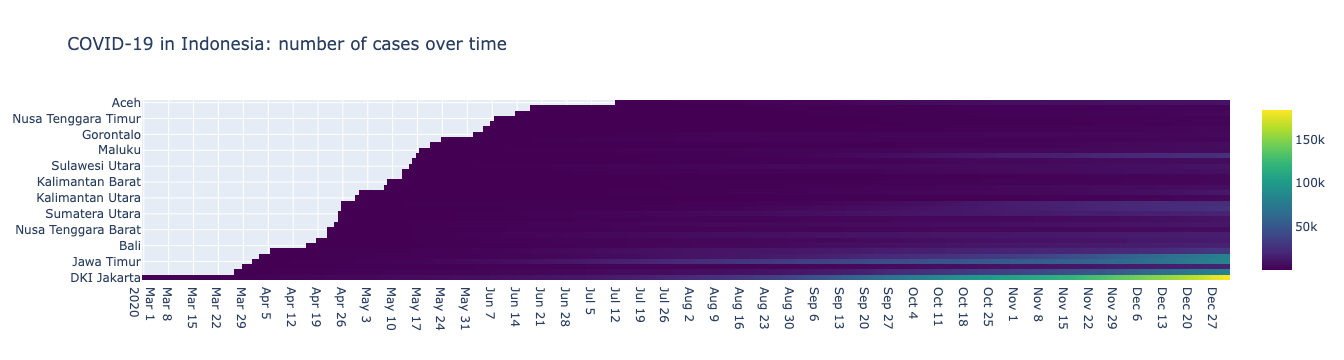

In [88]:
heatmap = data[(data[ColumnData.cases] >= 100)].sort_values([ColumnData.date, ColumnData.province])
vis_hmap = go.Figure(data=go.Heatmap(
    z=heatmap[ColumnData.cases],
    x=heatmap[ColumnData.date],
    y=heatmap[ColumnData.province],
    colorscale='Viridis'))

vis_hmap.update_layout(
    title='COVID-19 in Indonesia: number of cases over time', xaxis_nticks=45)

vis_hmap.show()

> Pada visualisasi diatas merupakan peta sebaran COVID-19 pada 34 provinsi di Indonesia menggunakan visualisasi heatmap yang menunjukkan tingkat keparahan atau tingginya kasus perhari nya dengan menunjukkan perubahan warna. Dalan visualisasi ini didapatkan DKI Jakarta memiliki perubahan warna yang signifikan yang menandakan DKI Jakarta mendapati tingkat kasus yang lebih banyak.

Menggunakan korelasi matriks

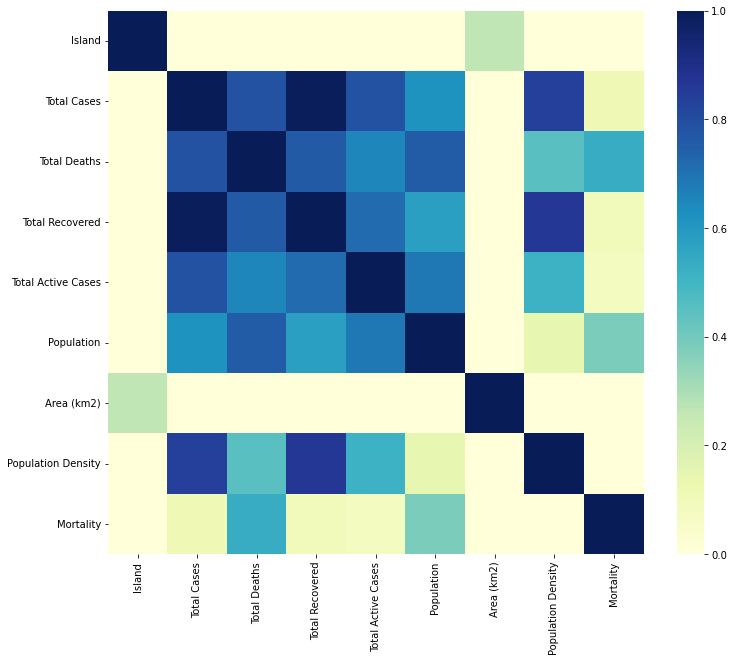

In [89]:
t.replace({'Jawa': 0, 'Sulawesi': 1, 'Kalimantan': 2, 'Sumatera': 3, 'Maluku': 4, 'Papua': 5, 'Nusa Tenggara': 6},
          inplace=True)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(t.corr(), vmin=0, cmap='YlGnBu')
plt.show()

Dari hasil visualisasi korelasi matriks didapatkan korelasi antar fitur. Berdasarkan eksplorasi data yang telah diolah maka kami dapat melihat korelasi yang lebih kuat dengan jumlah kasus yaitu fitur berikut : 
1. Total Cases
2. Total Recovered
3. Total Active Cases
4. Population Density
5. Total Deaths
6. Population
7. Mortality

fitur-fitur ini yang akan digunakan untuk pengolahan data selanjutnya.

Normalisasi, binning dan splitting dataset

Splitting dataset dengan memilih fitur yang akan digunakan yaitu 'Total Cases', 'Total Recovered', 'Total Active Cases', 'Population Density', 'Total Deaths', 'Population', 'Mortality'

In [99]:
corr = t.corr().iloc[[0, 1]].transpose()
corr = corr[(corr[ColumnData.cases] > 0.25)].sort_values(ColumnData.cases, ascending=False)
features = corr.index.tolist()
features.append(ColumnData.mortality)
print('Selected features:', features)

d = t[features].copy()
d.head()

Selected features: ['Total Cases', 'Total Recovered', 'Population Density', 'Total Deaths', 'Total Active Cases', 'Population', 'Mortality']


,Total Cases,Total Recovered,Population Density,Total Deaths,Total Active Cases,Population,Mortality
Province,,,,,,,
DKI Jakarta,183735,164776,16334.31,3270,15689,10846145,0.017797
Jawa Timur,84152,72135,846.78,5827,6190,40479023,0.069244
Jawa Barat,83579,70896,1276.55,1172,11511,45161325,0.014023
Jawa Tengah,81716,54212,1108.64,3361,24143,36364072,0.041130
Sulawesi Selatan,31047,25861,201.78,580,4606,9426885,0.018681


Dari fitur yang dipilih akan dilakukan binning menjadi 7 bagian dan selanjutnya dilakukan normalisasi data sehingga mengurangi adanya outliers dan data lebih mudah dipahami dengan jarak antara 0-1

In [115]:
create_bins(d, [
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.mortality,
    ColumnData.density
], q=7)

normalize_data(d, d.columns)
d.head()

,Total Cases,Total Recovered,Population Density,Total Deaths,Total Active Cases,Population,Mortality
Province,,,,,,,
DKI Jakarta,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.166667
Jawa Timur,1.0,1.0,0.833333,1.000000,1.000000,1.000000,1.000000
Jawa Barat,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000
Jawa Tengah,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
Sulawesi Selatan,1.0,1.0,0.666667,0.833333,0.833333,0.833333,0.333333


# Modelling, Pengujian Data dan Analisis Data

In [92]:
#selecting features  
X = d[['Mortality', 'Total Cases','Total Active Cases', 'Population Density', 'Population', 'Total Deaths']]  

Menggunakan WCSS dengan Metode Elbow Graph untuk menentukan nilai cluster(k)

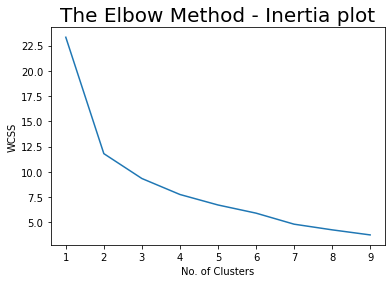

In [93]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

> Pada visualisasi diatas dapat terlihat elbow pada 2 dan 6. dan dalam pengujian ini saya menggunakan k=6 agar lebih terlihat dan dapat lebih dapat insight yang diberikan

K-means Clustering dengan k=6

In [94]:
kmeans = KMeans(n_clusters=6)
pred = kmeans.fit_predict(d[d.columns])
t['K-means'], d['K-means'] = [pred, pred]
d[d.columns].sort_values(['K-means', ColumnData.mortality, ColumnData.cases, ColumnData.actives_cases, ColumnData.density], ascending=False).style.background_gradient(
    cmap='YlGnBu', low=0, high=0.2)

,Total Cases,Total Recovered,Population Density,Total Deaths,Total Active Cases,Population,Mortality,K-means
Province,,,,,,,,
Maluku Utara,0.000000,0.166667,0.166667,0.166667,0.000000,0.000000,0.833333,5
Sulawesi Tengah,0.166667,0.000000,0.166667,0.333333,0.500000,0.333333,0.666667,5
Bengkulu,0.166667,0.166667,0.500000,0.333333,0.333333,0.166667,0.666667,5
Gorontalo,0.166667,0.166667,0.500000,0.166667,0.000000,0.000000,0.666667,5
Kepulauan Riau,0.333333,0.500000,0.833333,0.333333,0.166667,0.166667,0.500000,5
Lampung,0.333333,0.333333,0.833333,0.500000,0.500000,0.833333,1.000000,4
Nusa Tenggara Barat,0.333333,0.333333,0.833333,0.500000,0.500000,0.666667,1.000000,4
Sulawesi Utara,0.500000,0.500000,0.666667,0.666667,0.666667,0.333333,0.833333,4
Bali,0.666667,0.666667,0.833333,0.666667,0.833333,0.500000,0.666667,4


Visualisasi dengan Treemap hasil Klasterisasi Provinsi

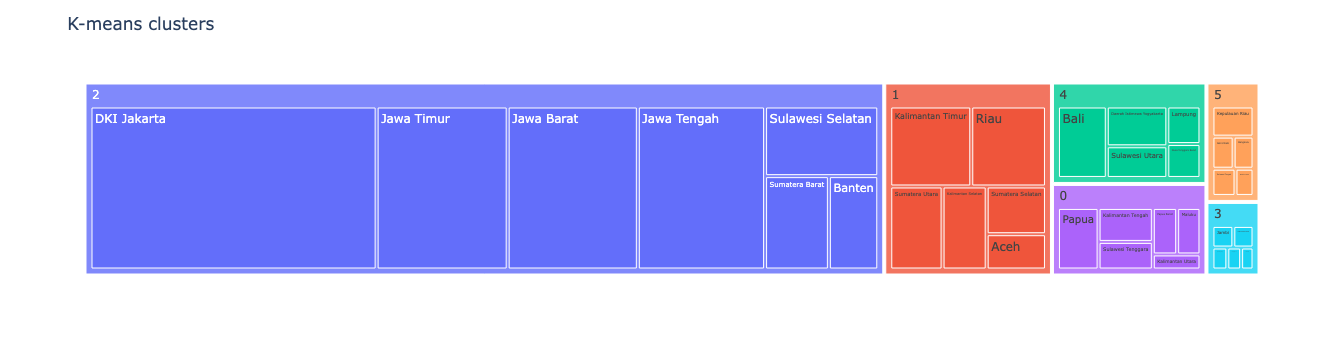

In [95]:
vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.cases)
vis_tmap.update_layout(title='K-means clusters')
vis_tmap.show()

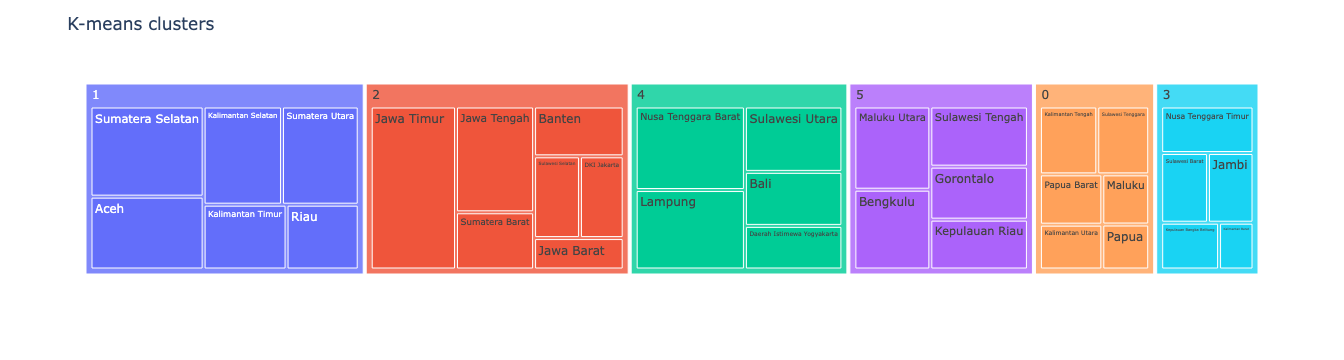

In [96]:
vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.mortality)
vis_tmap.update_layout(title='K-means clusters')
vis_tmap.show()

Visualisasi Jumlah kasus aktif dari tiap provinsi dari masing-masing cluster menggunakan bar chart

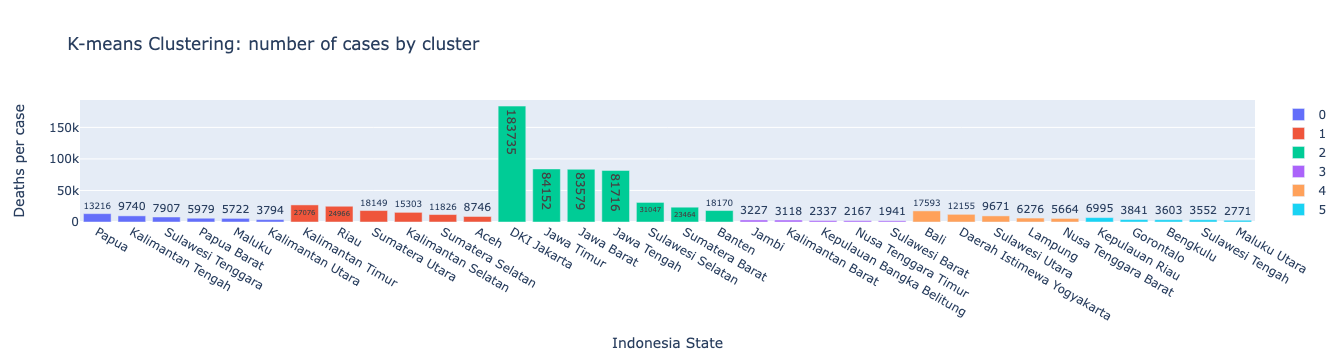

In [97]:
c = t.sort_values(['K-means', ColumnData.cases], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.cases],
               text=c[(c['K-means'] == i)][ColumnData.cases], name=i) for i in range(0, 6)]

vis_bar = go.Figure(data=data)
vis_bar.update_layout(title='K-means Clustering: number of cases by cluster',
                      xaxis_title='Indonesia State', yaxis_title='Deaths per case')
vis_bar.show()

Visualisasi Jumlah kemungkinan Kematian	 dari tiap provinsi dari masing-masing cluster.

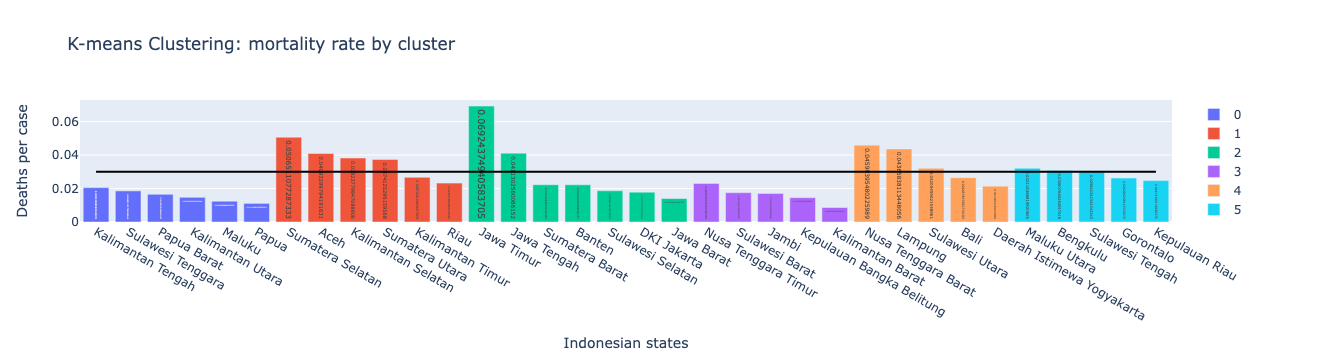

In [98]:
# visualization using bar chart
# visualization mortality rate by clusters
c = t.sort_values(['K-means', ColumnData.mortality], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.mortality],
               text=c[(c['K-means'] == i)][ColumnData.mortality], name=i) for i in range(0, 6)]
data.append(
    go.Scatter(
        x=t.sort_values(ColumnData.mortality, ascending=False).index,
        y=np.full((1, len(t.index)), 0.03).tolist()[0],
        marker_color='black',
        name='Indonesian avg'
    )
)

vis_bar2 = go.Figure(data=data)
vis_bar2.update_layout(title='K-means Clustering: mortality rate by cluster',
                       xaxis_title='Indonesian states', yaxis_title='Deaths per case')
vis_bar2.show()

> Pada visualisasi diagram batang yang menunjukkan visualisasi tingkat kemungkinan kematian dari tiap-tiap provinsi menurut cluster yang telah dibagi sebelumnya. Dari ke-6 cluster diatas, cluster 1,2,4, dan 5 berada di atas rata-rata kemungkinan kematian di Indonesia dan Cluster 1 merupakan cluster yang memiliki tingkat kematian yang cukup besar dibandingkan cluster yang lain, Sedangkan provinsi yang memiliki tingkat kematian tergolong rendah terdapat pada cluster 2.   

# Output/Insight

Pada karakteristik data diketahui bahwa rata-rata kasus baru setiap harinya sebanyak 1.713 kasus dengan kasus baru terbanyak yang terjadi pada 8 Oktober 2020 dengan jumlah kasus mencapai 4.850 kasus. Hingga 11 Oktober 2020 tercatat sebanyak 333.449 kasus dengan jumlah pasien sembuh sebanyak 255.027 orang dan jumlah pasien yang meninggal sebanyak 11.844 orang. DKI Jakarta menempati posisi pertama dengan jumlah kasus tertinggi yakni sebanyak 86.963 kasus. Provinsi dengan jumlah kasus paling banyak lainnya yaitu Jawa Timur, Jawa Barat, Jawa Tengah dan Sulawesi Selatan. Sedangkan provinsi dengan tingkat kematian paling tinggi akibat COVID-19 yaitu provinsi Jawa Timur. Dari hasil ini didapatkan bahwa Jumlah kematian pasien COVID-19 di suatu provinsi bukan acuan utama dalam menentukan klaster penanganan COVID-19, disamping menghitung jumlah kematian pasien ada indikator lain yang dapat mempengaruhi pembagian klasterisasi dalam penentuan penanganan COVID-19 di Indonesia Seperti tingkat kemungkinan kematian, jumlah kasus yang masih aktif, kepadatan penduduk dan luas area provinsi tersebut.